# 신용카드 거래 데이터 시각화 - 뱅크셀러드

## 컬럼 설명

* store_id : 각 파일에서 상점 고유 번호
 
* date : 거래 일자

* time : 거래 시간

* card_id : 카드번호 hash 값

* amount : 매출액, 0보다 작은 음수는 거래 취소(환불) / 할부개월수만큼 amount 들어옴

* installments : 할부개월수, 일시불은 빈 문자열

* days_of_week : 요일, 월요일이 0, 일요일이 6

* holyday : 1이면 공휴일, 0이면 공휴일 아님

1. 월별 거래 횟수
2. 시간별 거래 횟수
3. 요일별 거래 횟수(주말)
4. 거래 금액과 횟수 = 할부
5. 상점당 거래 횟수

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

In [ ]:
train = pd.read_csv('train.csv')
train.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


In [ ]:
train.info()
# date / time : object > datetime으로 변환

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_id      int64  
 1   date          object 
 2   time          object 
 3   card_id       object 
 4   amount        int64  
 5   installments  float64
 6   days_of_week  int64  
 7   holyday       int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 205.2+ MB


In [ ]:
train.describe()
# 평균 / 중앙값에 대한 판단 > 이상치를 보고 판단

,store_id,amount,installments,days_of_week,holyday
count,3.362796e+06,3.362796e+06,16860.000000,3.362796e+06,3.362796e+06
mean,8.323770e+02,1.459623e+02,3.459490,3.066320e+00,4.431283e-02
std,5.468544e+02,6.017306e+02,2.382382,1.976153e+00,2.057892e-01
min,0.000000e+00,-2.500000e+05,2.000000,0.000000e+00,0.000000e+00
25%,3.350000e+02,3.200000e+01,3.000000,1.000000e+00,0.000000e+00
50%,8.220000e+02,7.500000e+01,3.000000,3.000000e+00,0.000000e+00
75%,1.342000e+03,1.500000e+02,3.000000,5.000000e+00,0.000000e+00
max,1.799000e+03,2.500000e+05,36.000000,6.000000e+00,1.000000e+00


###  이상치 제거

* 이상치가 있을 수 있다고 판단되는 컬럼 판단 : amount

* vilonplot이용 분포 확인


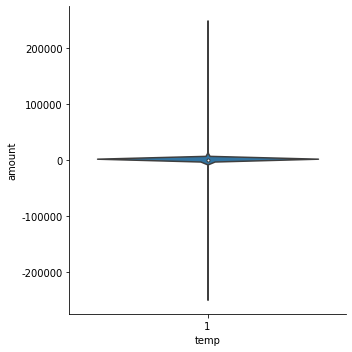

In [ ]:
train['temp'] = 1
sns.catplot(data=train, x="temp", y="amount", kind="violin")
# 정규분포의 형태를 안 띄는 것 확인

* 분포 범위는 넓은데 반해 분포는 한쪽으로 편중 되어있음. numpy > percentile을 이용해 비율 확인

In [ ]:
# 99% 이상치
percentage_99 = np.percentile(train["amount"], 99)
print(percentage_99)

1335.0


In [ ]:
# 98% 이상치
percentage_98 = np.percentile(train["amount"], 98)
print(percentage_98)

800.0


In [ ]:
# 99% 이상치 판단 : '1335' 제거 후 반대로 -'1335'제거(거래취소)
train = train[(train["amount"] <= 1335) & (train["amount"] >= -1335)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


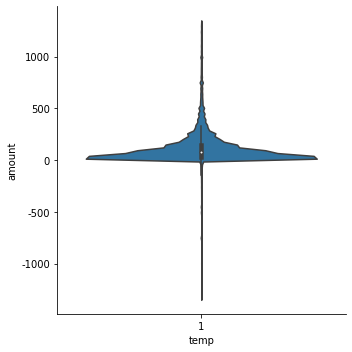

In [ ]:
train['temp'] = 1
sns.catplot(data=train, x="temp", y="amount", kind="violin")

In [ ]:
# 결측값 확인
train.isnull().sum()

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3316484
days_of_week          0
holyday               0
temp                  0
dtype: int64

In [ ]:
# installments : 할부개월수, 일시불은 빈 문자열 > 따라서 1으로 대입
train['installments'] = train['installments'].fillna(1)
train.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


store_id        0
date            0
time            0
card_id         0
amount          0
installments    0
days_of_week    0
holyday         0
temp            0
dtype: int64

* 총액 : 할부 * 금액

* total = amount * installments

In [ ]:
train["total"] = train["amount"] * train["installments"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3327373 entries, 0 to 3362795
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_id      int64  
 1   date          object 
 2   time          object 
 3   card_id       object 
 4   amount        int64  
 5   installments  float64
 6   days_of_week  int64  
 7   holyday       int64  
 8   temp          int64  
 9   total         float64
dtypes: float64(2), int64(5), object(3)
memory usage: 279.2+ MB


In [ ]:
del train["temp"]

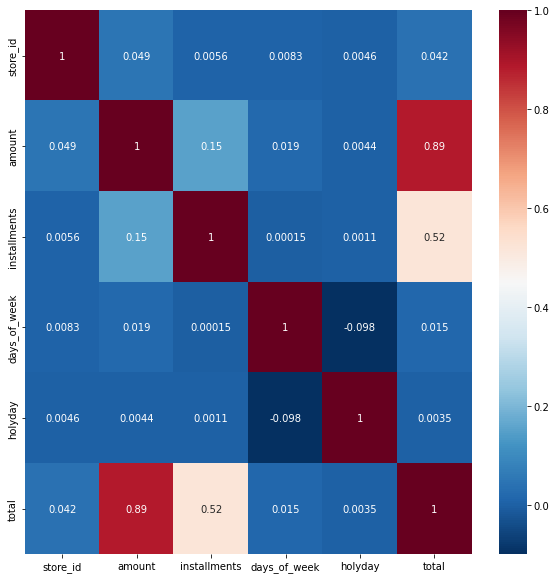

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(train[train.columns].corr(), cmap="RdBu_r", annot=True)

In [ ]:
count_store = train.groupby('store_id').count()['card_id'].sort_values(ascending = False)
count_store

store_id
0       68748
753     39244
105     36011
1342    33329
428     33282
        ...  
608         1
689         1
304         1
201         1
1684        1
Name: card_id, Length: 1749, dtype: int64

In [ ]:
count_store.head(10)

store_id
0       68748
753     39244
105     36011
1342    33329
428     33282
221     31407
161     26389
1038    25694
323     25220
1366    24942
Name: card_id, dtype: int64

계산 횟수가 많은 순서 : 0, 753, 105, 1342, 428

In [ ]:
count_store.tail(10)

store_id
320     1
1740    1
453     1
536     1
982     1
608     1
689     1
304     1
201     1
1684    1
Name: card_id, dtype: int64

In [ ]:
total_store = train.groupby('store_id').sum()['total'].sort_values(ascending = False)
total_store

store_id
753     9383494.0
1342    7395226.0
0       5365850.0
161     4825989.0
1076    4149892.0
          ...    
846           0.0
350           0.0
866           0.0
189           0.0
988           0.0
Name: total, Length: 1749, dtype: float64

In [ ]:
total_store.head(10)

store_id
753     9383494.0
1342    7395226.0
0       5365850.0
161     4825989.0
1076    4149892.0
1024    3063786.0
104     2976609.0
597     2877949.0
1209    2871284.0
393     2647565.0
Name: total, dtype: float64

금액이 많은 순서 : 753, 1342, 0, 161, 1076

In [ ]:
total_store.tail(10)

store_id
703     5.0
608     5.0
1760    0.0
1783    0.0
389     0.0
846     0.0
350     0.0
866     0.0
189     0.0
988     0.0
Name: total, dtype: float64

* 날짜 시간 Column을 생성

In [ ]:
def split_date(date):
    return date.split("-")

In [ ]:
train["year"], train["month"], train["day"] = zip(*train['date'].apply(lambda x: split_date(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def split_time(time):
    return time.split(":")

In [ ]:
train["hour"], train["minute"], train["second"] = zip(*train['time'].apply(lambda x: split_time(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train["year"] = train["year"].astype(int)
train["month"] = train["month"].astype(int)
train["day"] = train["day"].astype(int)
train["hour"] = train["hour"].astype(int)
train["minute"] = train["minute"].astype(int)
train["second"] = train["second"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
train.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,total,year,month,day,hour,minute,second
0,0,2016-12-14,18:05:31,d297bba73f,5,1.0,2,0,5.0,2016,12,14,18,5,31
1,0,2016-12-14,18:05:54,d297bba73f,-5,1.0,2,0,-5.0,2016,12,14,18,5,54
2,0,2016-12-19,12:42:31,0880849c05,144,1.0,0,0,144.0,2016,12,19,12,42,31
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1.0,0,0,66.0,2016,12,19,12,48,8
4,0,2016-12-19,13:31:08,7ad237eed0,24,1.0,0,0,24.0,2016,12,19,13,31,8


In [ ]:
# 년 별
year_total = train.groupby('year').mean()['total'].sort_values(ascending = False)
year_total
# 2017년에 많으며, 2016 2018 순서이다.

year
2017    123.999543
2016    123.759702
2018    119.712876
Name: total, dtype: float64

In [ ]:
# 월 별
month_total = train.groupby('month').mean()['total'].sort_values(ascending = False)
month_total
# 12월 2월 1월 순서

month
12    130.823951
2     129.988848
1     126.322964
3     124.679995
11    122.621078
4     120.742819
10    120.058933
5     120.016401
8     120.005885
7     119.083034
9     118.676751
6     117.327746
Name: total, dtype: float64

In [ ]:
# 일 별
day_total = train.groupby('day').mean()['total'].sort_values(ascending = False)
day_total
# 월 초와 월 말의 소비가 많은 것 확인 가능

day
31    125.960447
1     124.834301
2     124.484251
3     123.624661
25    123.469885
29    123.355620
30    123.310770
24    123.108881
26    122.958264
14    122.701347
17    122.618823
10    122.511830
18    122.350672
6     122.341205
7     122.317958
5     122.309656
28    122.262243
8     122.068110
13    121.982221
27    121.889588
15    121.744223
12    121.699681
11    121.619742
9     121.556215
4     121.493742
23    121.281109
16    121.031049
20    121.007524
22    120.979464
21    120.725982
19    120.001515
Name: total, dtype: float64

In [ ]:
# 요일 별 
days_of_week_total = train.groupby('days_of_week').mean()['total'].sort_values(ascending = False)
days_of_week_total
# 토요일, 금요일 순서

days_of_week
5    130.420602
4    124.078220
6    121.923081
3    121.226094
2    120.609023
1    119.559647
0    116.871816
Name: total, dtype: float64

In [ ]:
# 요일 / 공휴일
days_of_week_holyday_total = train.groupby(['days_of_week','holyday']).mean()['total'].sort_values(ascending = False)
days_of_week_holyday_total
# 그룹을 두개 이상 짓는 경우 seaborn : hue 사용

days_of_week  holyday
5             1          138.655578
6             1          133.769610
4             1          131.279311
5             0          130.229321
3             1          129.386526
4             0          123.842328
0             1          123.706818
6             0          121.628016
3             0          120.937726
2             0          120.693433
1             1          119.848448
              0          119.540042
2             1          119.212025
0             0          116.242165
Name: total, dtype: float64

In [ ]:
# 공휴일 유무
holyday_total = train.groupby('holyday').mean()['total'].sort_values(ascending = False)
holyday_total

holyday
1    125.536380
0    122.172181
Name: total, dtype: float64

In [ ]:
# 공휴일과 시간별
# 공휴일 유무
hour_holyday_total = train.groupby(['hour','holyday']).mean()['total'].sort_values(ascending = False)
hour_holyday_total
# 그룹을 두개 이상 짓는 경우 seaborn : hue 사용

hour  holyday
3     1          166.689707
2     0          159.319664
      1          159.115098
1     0          158.810258
0     1          158.202195
      0          157.394672
1     1          157.087627
20    0          153.152062
23    0          153.057973
21    0          152.786032
3     0          150.412278
22    0          146.188711
20    1          145.085571
19    1          139.330219
23    1          136.214685
21    1          135.914730
4     1          135.582656
19    0          132.242905
4     0          129.116402
22    1          127.154367
6     1          126.560855
      0          124.296118
18    1          123.432847
13    1          118.338510
14    1          118.216724
5     1          117.687023
15    1          115.170553
5     0          115.052022
18    0          114.659184
16    1          113.962859
12    1          112.984881
17    1          112.217555
14    0          111.446850
15    0          111.037277
17    0          110.983132
11    

In [ ]:
# 시간별
hour_total = train.groupby('hour').mean()['total'].sort_values(ascending = False)
hour_total
# 새벽과 밤의 수요가 많은 것을 확인 가능

hour
2     159.305158
1     158.698421
0     157.444584
20    152.820716
23    152.367701
21    152.121550
3     151.540677
22    145.438393
19    132.550725
4     129.522780
6     124.393733
5     115.189820
18    115.057987
14    111.822181
15    111.269762
17    111.045484
16    109.837266
13    104.610967
11    103.811879
7     100.797371
12    100.771945
10     99.800940
9      89.251200
8      83.505584
Name: total, dtype: float64

In [ ]:
# 시간과 요일별
hour_days_of_week_total = train.groupby(['hour','days_of_week']).mean()['total'].sort_values(ascending = False)
hour_days_of_week_total

# 그룹을 두개 이상 짓는 경우 seaborn : hue 사용

hour  days_of_week
2     5               169.492174
1     5               167.426536
0     5               164.571964
      4               164.077544
3     5               163.970805
                         ...    
8     1                82.443068
      0                81.527871
      2                80.064734
      3                79.862937
      4                77.854132
Name: total, Length: 168, dtype: float64

## 분석 3등 코드

코드 참조 : https://dacon.io/competitions/official/42473/codeshare/429?page=1&dtype=recent

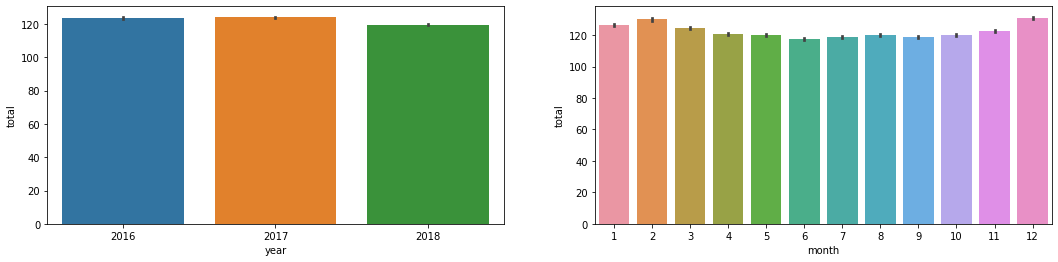

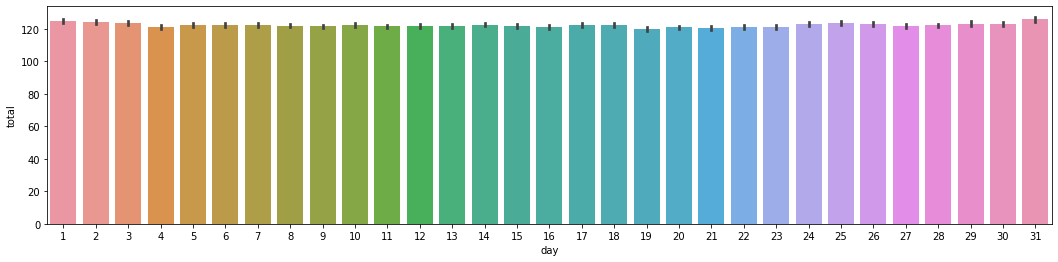

In [ ]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
# 연 별 그래프 시각화
sns.barplot(data=train, x="year", y="total", ax=ax1)
# 월 별 그래프 시각화 
sns.barplot(data=train, x="month", y="total", ax=ax2)
# 연말 연초에 많은 것을 확인 가능(12 ~ 3)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
# 일 별 그래프 시각화
sns.barplot(data=train, x="day", y="total", ax=ax3)

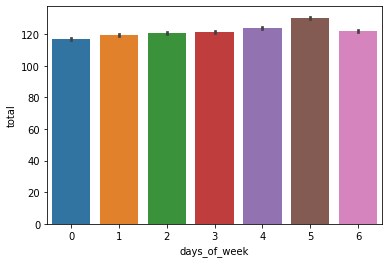

In [ ]:
# 요일별 그래프 시각화
sns.barplot(data=train, x="days_of_week", y="total")
# 금, 토요일에 많은 것을 확인 가능하다.

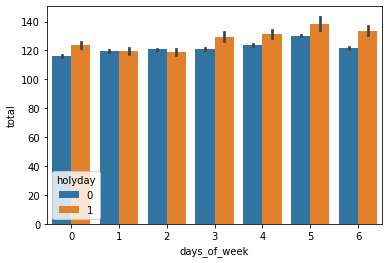

In [ ]:
# 공휴일 유무에 따른 요일별 그래프 시각화
sns.barplot(data=train, x="days_of_week", y="total", hue="holyday")

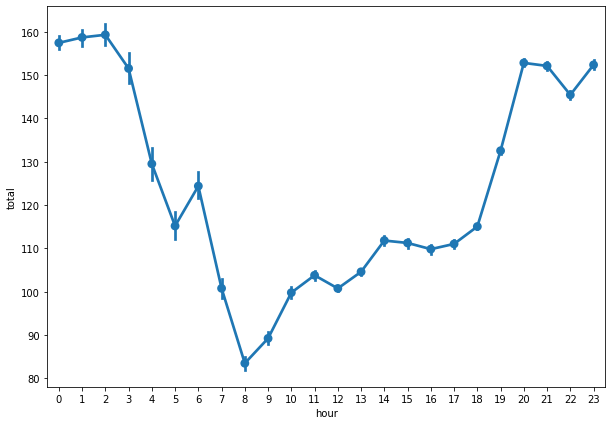

In [ ]:
# 시간별 그래프 시각화
plt.figure(figsize=(10, 7))
sns.pointplot(data=train, x="hour", y="total")
# 20시 ~ 4시까지 수요가 많으며, 오전 시간에는 수요가 적은 것 확인 가능

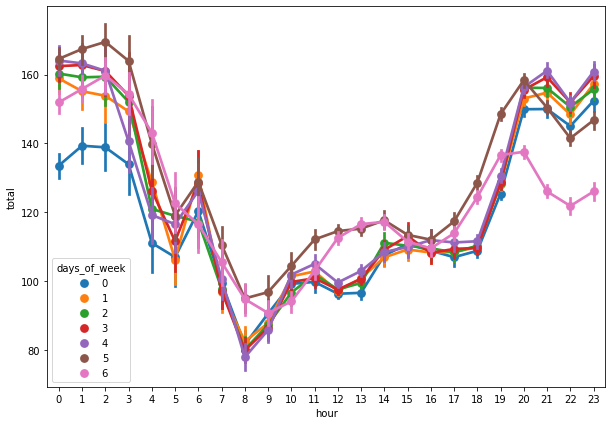

In [ ]:
# 요일, 시간별 그래프 시각화
plt.figure(figsize=(10, 7))
sns.pointplot(data=train, x="hour", y="total", hue="days_of_week")
# 그래프가 전체적으로 비슷하지만, 일요일 밤 ~ 월요일 새벽에 수요가 적은 것을 확인 할 수 있다.

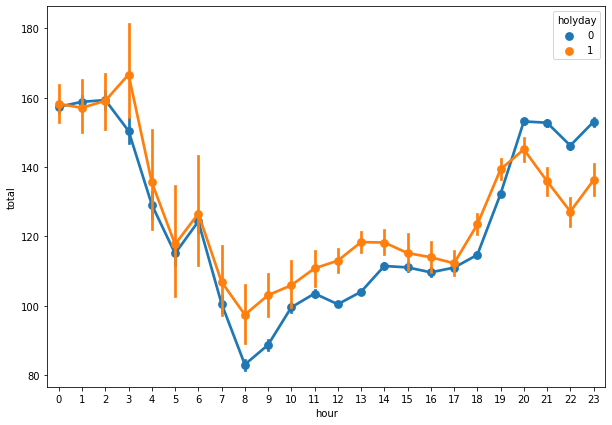

In [ ]:
plt.figure(figsize=(10, 7))
sns.pointplot(data=train, x="hour", y="total", hue="holyday")
# 휴일의 새벽 수요가 많으며, 평일 저녁 수요가 많은 것을 볼 수 있다.

* 다음날 쉬는지의 대한 유무 판단

In [ ]:
train["nextday_holiday"] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# 금요일 / 토요일을 1로 변경
train.loc[(train["days_of_week"] == 4) | (train["days_of_week"] == 5), "nextday_holiday"] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
train["nextday_year"] = train["year"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train["nextday_month"] = train["month"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# 날짜를 하루 미뤄서 입력
train["nextday_day"] = train["day"] + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2016년 8월 - 31일, 9월 - 30일, 10월 - 31일, 11월 - 30일, 12월 - 31일

2017년 1월 - 31일, 2월 - 28일, 3월 - 31일, 4월 - 30일, 5월 - 31일, 6월 - 30일, 7월 - 31일, 8월 - 31일, 9월 - 30일, 10월 - 31일, 11월 - 30일, 12월 - 31일

2018년 1월 - 31일, 2월 - 28일, 3월 - 31일, 4월 - 30일, 5월 - 31일, 6월 - 30일, 7월 - 31일, 8월 - 31일

In [ ]:
# 2016년 12월 31일의 다음날은 2017년 1월 1이므로 연도와 월, 날짜 모두 변경되어야 한다
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2016) & (train["month"] == 12), "nextday_year"] = train["year"] + 1
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2016) & (train["month"] == 12), "nextday_month"] = 1

# 마지막 날짜가 31일인 달(12월 제외)
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2016) & ((train["month"] == 8) | (train["month"] == 10) | (train["month"] == 12)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2016) & ((train["month"] == 8) | (train["month"] == 10)), "nextday_month"] = train["month"] + 1

# 마지막 날짜가 30일인 달
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2016) & ((train["month"] == 9) | (train["month"] == 11)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2016) & ((train["month"] == 9) | (train["month"] == 11)), "nextday_month"] = train["month"] + 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
# 2017년 12월 31일의 다음날은 2018년 1월 1이므로 연도와 월, 날짜 모두 변경되어야 한다
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & (train["month"] == 12), "nextday_year"] = train["year"] + 1
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & (train["month"] == 12), "nextday_month"] = 1
# 마지막 날짜가 31일인 달(12월 제외)
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & ((train["month"] == 1) | (train["month"] == 3) | (train["month"] == 5) | (train["month"] == 7) | (train["month"] == 8) | (train["month"] == 10) | (train["month"] == 12)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & ((train["month"] == 1) | (train["month"] == 3) | (train["month"] == 5) | (train["month"] == 7) | (train["month"] == 8) | (train["month"] == 10)), "nextday_month"] = train["month"] + 1
# 마지막 날짜가 30일인 달
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2017) & ((train["month"] == 4) | (train["month"] == 6) | (train["month"] == 9) | (train["month"] == 11)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2017) & ((train["month"] == 4) | (train["month"] == 6) | (train["month"] == 9) | (train["month"] == 11)), "nextday_month"] = train["month"] + 1
# 마지막 날짜가 28일인 달
train.loc[(train["nextday_day"] == 29) & (train["year"] == 2017) & (train["month"] == 2), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 29) & (train["year"] == 2017) & (train["month"] == 2), "nextday_month"] = train["month"] + 1

In [ ]:
# 마지막 날짜가 31일인 달
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & ((train["month"] == 1) | (train["month"] == 3) | (train["month"] == 5) | (train["month"] == 7) | (train["month"] == 8)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & ((train["month"] == 1) | (train["month"] == 3) | (train["month"] == 5) | (train["month"] == 7) | (train["month"] == 8)), "nextday_month"] = train["month"] + 1
# 마지막 날짜가 30일인 달
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2017) & ((train["month"] == 4) | (train["month"] == 6)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2017) & ((train["month"] == 4) | (train["month"] == 6)), "nextday_month"] = train["month"] + 1
# 마지막 날짜가 28일인 달
train.loc[(train["nextday_day"] == 29) & (train["year"] == 2017) & (train["month"] == 2), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 29) & (train["year"] == 2017) & (train["month"] == 2), "nextday_month"] = train["month"] + 1

In [ ]:
train["nextday_year_str"] = train["nextday_year"].astype(str)
train["nextday_month_str"] = train["nextday_month"].astype(str)
train["nextday_day_str"] = train["nextday_day"].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
# 9월 > 09월로 변환
for month in range(10):
    train.loc[(train["nextday_month_str"] == str(month)), "nextday_month_str"] = "0" + str(month)

In [ ]:
# 1일 > 01일로 변환
for day in range(10):
    train.loc[(train["nextday_day_str"] == str(day)), "nextday_day_str"] = "0" + str(day)

In [ ]:
train["nextday_date"] = train["nextday_year_str"] + "-" + train["nextday_month_str"] + "-" + train["nextday_day_str"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train[["date", "nextday_date"]].head()

,date,nextday_date
0,2016-12-14,2016-12-15
1,2016-12-14,2016-12-15
2,2016-12-19,2016-12-20
3,2016-12-19,2016-12-20
4,2016-12-19,2016-12-20


In [ ]:
train_holiday = train.loc[train["holyday"] == 1]

In [ ]:
#train_holiday의 date값을 중복되지 않게 list로 만듭니다

my_list = train_holiday["date"].values
uniqueVals = np.unique(my_list)
holiday_date_list = uniqueVals.tolist()

In [ ]:
holiday_date_list

['2016-08-15',
 '2016-09-14',
 '2016-09-15',
 '2016-09-16',
 '2016-10-03',
 '2016-10-09',
 '2016-12-25',
 '2017-01-01',
 '2017-01-27',
 '2017-01-28',
 '2017-01-29',
 '2017-01-30',
 '2017-03-01',
 '2017-05-01',
 '2017-05-03',
 '2017-05-05',
 '2017-05-09',
 '2017-06-06',
 '2017-08-15',
 '2017-10-02',
 '2017-10-03',
 '2017-10-04',
 '2017-10-05',
 '2017-10-06',
 '2017-10-09',
 '2017-12-25',
 '2018-01-01',
 '2018-02-15',
 '2018-02-16',
 '2018-02-17',
 '2018-03-01',
 '2018-05-01',
 '2018-05-05',
 '2018-05-07',
 '2018-05-22',
 '2018-06-06',
 '2018-06-13']

In [ ]:
# train 데이터의 nextday_date값이 holiday_date_list에 속해있으면, nextday_holiday컬럼의 값을 1로 채움
idx = [idx for idx, value in enumerate(train["nextday_date"]) if value in holiday_date_list]

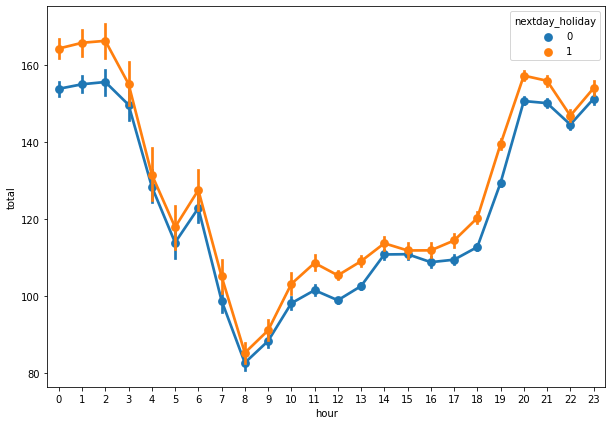

In [ ]:
plt.figure(figsize=(10, 7))
sns.pointplot(data=train, x="hour", y="total", hue="nextday_holiday")
# 전체적으로 휴일의 수요가 많으며, 공휴일의 금, 토요일의 새벽 수요가 많다

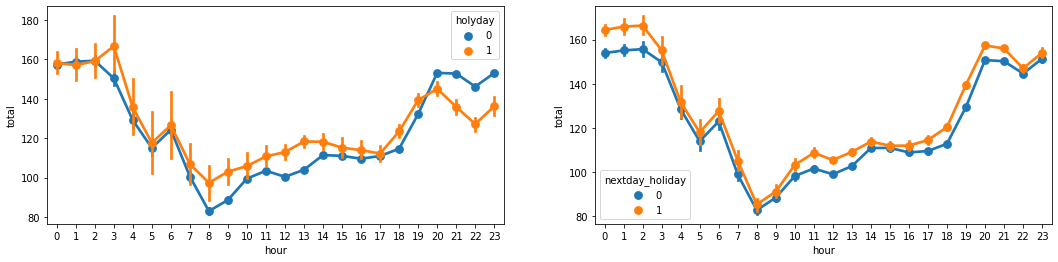

In [ ]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.pointplot(data=train, x="hour", y="total", hue="holyday", ax=ax1)
sns.pointplot(data=train, x="hour", y="total", hue="nextday_holiday", ax=ax2)

In [ ]:
total_over0 = train.loc[train["total"] >= 0]

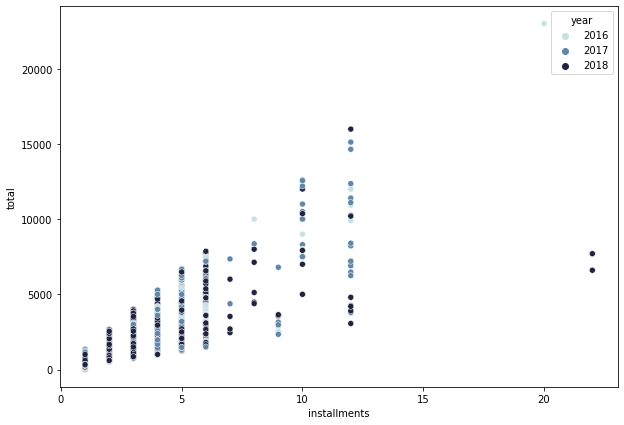

In [ ]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
plt.figure(figsize=(10, 7))
sns.scatterplot(data=total_over0, x="installments", y="total", hue="year", palette=cmap)
# 할부 개월 수는 금액이 클수록 커진는 양의 상관관계를 가진다.

참조 : https://dacon.io/competitions/official/42473/codeshare/427?page=1&dtype=recent

## 분석 1등 코드

In [ ]:
### 패키지 설치 
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

import os
import string
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import plotly.graph_objs as go

import time
import random

In [ ]:
train = pd.read_csv("train.csv",parse_dates=['date'])
train.shape
# 데이터의 양을 확인

(3362796, 8)

In [ ]:
train.head()
# 데이터 판단
# 1. 시간
# 2. 식별화 코드
# 3. 매출

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


In [ ]:
# 요일 변수 생성 방법
train['date'] = pd.to_datetime(train['date'])
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day

train['hour'] = train['time'].apply(lambda x: x[0:2])
train['hour'] = train['hour'].astype('int')

train['weekend'] = train['days_of_week'].apply(lambda x: 1 if x > 4 else 0)

* Amount의 이상치의 수

* amount가 0보다 이하로 취소 된 경우는 33832건

* 거래의 표기실수는 1024건

* 실제로 거래가 취소 된 케이스는 두가지

1. 거래가 취소되고 재거래가 발생하지 않음.

2. 거래가 취소되고 재거래가 발생.

3. 거래가 취소되고 재거래가 발생하지 않음


In [ ]:
print(train[train['amount'] < 0].shape[0],train[train['amount']==0].shape[0])

33832 1024
